In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset_path = r"C:\Users\ADMIN\Desktop\archive" 

In [5]:
categories = os.listdir(dataset_path)
print("Categories:", categories)

Categories: ['TrashType_Image_Dataset']


In [3]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/376.0 MB 10.7 MB/s eta 0:00:36
   ---------------------------------------- 4.2/376.0 MB 10.1 MB/s eta 0:00:37
    --------------------------------------- 6.3/376.0 MB 9.9 MB/s eta 0:00:38
    --------------------------------------- 8.4/376.0 MB 9.8 MB/s eta 0:00:38
   - -------------------------------------- 11.3/376.0 MB 9.9 MB/s eta 0:00:37
   - -------------------------------------- 13.4/376.0 MB 9.9 MB/s eta 0:00:37
   - -------------------------------------- 15.5/376.0 MB 9.8 MB/s eta 0:00:37
   - -------------------------------------- 17.6/376.0 MB 9.8 MB/s eta 0:00:37
   -- ------------------------------------- 19.7/376.0 MB 9.9 MB/s eta 0:00:37
   -- ------------------------------------- 21.8/376.0 MB 9.8 MB/s eta 0:00:37
   -- ------------------------------------- 23.9/376.0 MB 9.8 MB/s eta 0:00:36
   -- ------------------------------------- 26.0/376.0 MB 9.8 

In [7]:
import tensorflow as tf


In [17]:
from tensorflow import keras  
from tensorflow.keras import layers, optimizers, callbacks  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Rescaling, GlobalAveragePooling2D 
from tensorflow.keras import Layer 
from tensorflow.keras.applications import EfficientNetV2B2  

In [13]:
!pip install gradio


   ---------------------------------------- 0.0/54.3 MB ? eta -:--:--
   - -------------------------------------- 2.4/54.3 MB 10.3 MB/s eta 0:00:06
   --- ------------------------------------ 4.5/54.3 MB 9.9 MB/s eta 0:00:06
   ---- ----------------------------------- 6.6/54.3 MB 10.1 MB/s eta 0:00:05
   ------ --------------------------------- 8.7/54.3 MB 9.9 MB/s eta 0:00:05
   ------- -------------------------------- 10.7/54.3 MB 9.9 MB/s eta 0:00:05
   --------- ------------------------------ 12.8/54.3 MB 9.8 MB/s eta 0:00:05
   ----------- ---------------------------- 14.9/54.3 MB 9.9 MB/s eta 0:00:04
   ------------ --------------------------- 17.0/54.3 MB 9.9 MB/s eta 0:00:04
   -------------- ------------------------- 19.1/54.3 MB 9.8 MB/s eta 0:00:04
   --------------- ------------------------ 21.2/54.3 MB 9.8 MB/s eta 0:00:04
   ----------------- ---------------------- 23.1/54.3 MB 9.8 MB/s eta 0:00:04
   ----------------- ---------------------- 24.4/54.3 MB 9.4 MB/s eta 0:00

In [15]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr  

In [19]:
dataset_path = r"C:\Users\ADMIN\Desktop\archive" 

In [21]:
image_size = (124, 124)
batch_size = 32
seed = 42


In [33]:
dataset_path = r"C:\Users\ADMIN\Desktop\archive\TrashType_Image_Dataset"


In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [37]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [39]:
print("✅ Dataset loaded.")
print("Class names:", train_ds.class_names)

✅ Dataset loaded.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


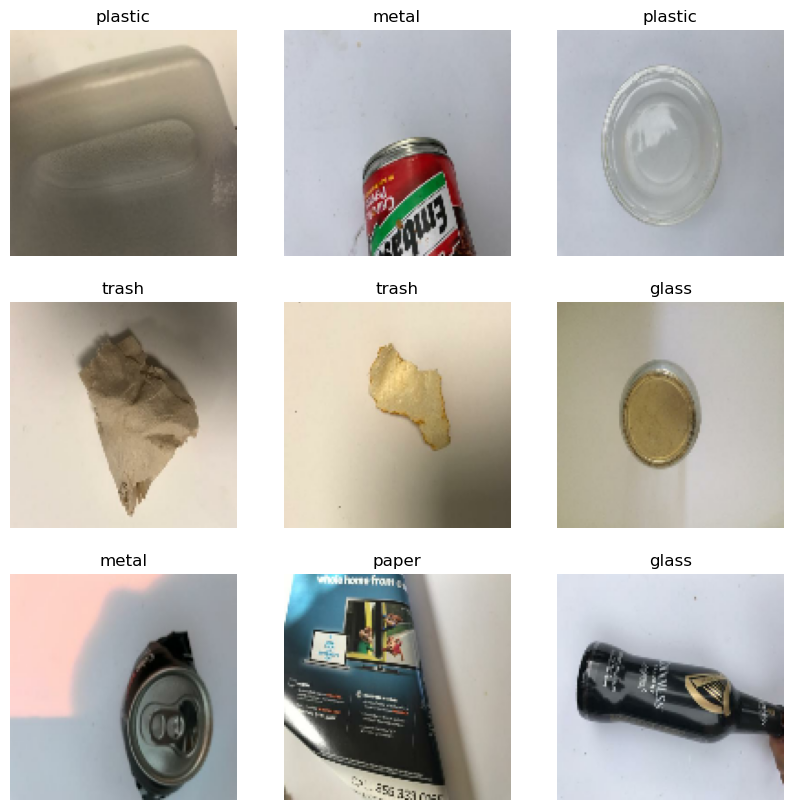

In [43]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
